Load documents and store them as a list of lists

In [26]:
import math
path = "../../data/lem"
year = "2010_2019"
category = "N_A"
num_topics = 20
file_name = year+"_"+category+"_no_names_beletrie"
file_path = path+"/"+file_name + ".txt"

def load_books_1000_blocks_from_document(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    books = []
    books_info = []
    start_tag = '<doc title="'
    end_tag = '</doc>'
    start_index = 0

    while True:
        book_start = content.find(start_tag, start_index)
        if book_start == -1:
            break

        book_end = content.find(end_tag, book_start)
        if book_end == -1:
            break

        book_text = content[book_start:book_end + len(end_tag)]
        book_info = book_text.strip()[5:book_text.index('>') + 1]  # Remove '<doc' and '</doc>'

        book_info_list = book_info.split('" ')
        book_info_dict = {}

        for item in book_info_list:
            key, value = item.split('=')
            book_info_dict[key.strip()] = value.strip('"')

        book_content = book_text[book_text.index('>') + 1:-len(end_tag)].strip()
        book_content = book_content.split(' ')
        length = len(book_content)
        CONST = 1000
        for i in range(math.ceil(length/CONST)):
            i = i*CONST
            end = i+CONST if i+CONST < length-1 else length-1
            books.append(" ".join(book_content[i:end]))
            books_info.append(book_info_dict)

        start_index = book_end + len(end_tag)

    return books, books_info

books, books_info = load_books_1000_blocks_from_document(file_path)

Preprocess the data

In [27]:
from gensim import corpora
import nltk
from nltk.tokenize import word_tokenize



# Tokenize the documents
tokenized_data = [word_tokenize(doc) for doc in books]

# Create a dictionary from the preprocessed data
dictionary = corpora.Dictionary(tokenized_data)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_data]


Perform LDA

In [ ]:
from gensim.models import LdaModel
from gensim.test.utils import datapath
passes = 10
alpha = 'auto'
eta = 'auto'
# Train the LDA model
# LDA - mixture of topics
# Iterative Bayesian proces  
lda_model = LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,  # Number of topics
    passes=passes,      # Number of iterations
    alpha = alpha, # scalar for a symmetric prior over document-topic distribution
    eta = eta
)

save_path = "../../data/models/1000 chunk/lda/lda_" + file_name
temp_file = datapath(save_path)

lda_model.save(temp_file)


Visualization LDA

In [26]:
import pyLDAvis.gensim
from gensim import  models
from gensim.test.utils import datapath

save_path = "../../data/models/1000 chunk/lda/lda_{num_topics}_topics".format(num_topics = num_topics) + file_name
temp_file = datapath(save_path)


lda_model = models.ldamodel.LdaModel.load(temp_file)

topic_words = lda_model.print_topics(num_topics = 20, num_words = 20)

with open("../../data/lda_20_topics_{year}.txt".format(year = year), "w", encoding = 'utf8') as output:
    for row in topic_words:
        output.write(str(row) + '\n')
print(topic_words)
# Visualize the LDA model
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
file_plot = '../../plots/Python/LDA/lda'+ '_' + year + '_' + category + '_'  + str(num_topics) + '_topics' +  '.html'
pyLDAvis.save_html(vis, file_plot)
pyLDAvis.display(vis)


[(0, '0.004*"rada" + 0.004*"koule" + 0.003*"ohnivý" + 0.003*"doba" + 0.003*"soudruh" + 0.003*"stůl" + 0.003*"loď" + 0.002*"informace" + 0.002*"vlastní" + 0.002*"jistý" + 0.002*"případ" + 0.002*"práce" + 0.002*"malý" + 0.002*"základna" + 0.002*"pravda" + 0.002*"prst" + 0.002*"problém" + 0.002*"zámek" + 0.002*"schopný" + 0.002*"stroj"'), (1, '0.005*"malý" + 0.004*"práce" + 0.004*"syn" + 0.004*"auto" + 0.003*"doba" + 0.003*"vlastní" + 0.003*"hotýlek" + 0.002*"peníze" + 0.002*"týden" + 0.002*"stůl" + 0.002*"problém" + 0.002*"dcera" + 0.002*"špatný" + 0.002*"plný" + 0.002*"jasný" + 0.002*"sestra" + 0.002*"noc" + 0.002*"pocit" + 0.002*"děda" + 0.002*"chvilka"'), (2, '0.008*"malý" + 0.007*"vlk" + 0.007*"kapitán" + 0.006*"divoch" + 0.004*"vlastní" + 0.004*"manžel" + 0.004*"kůň" + 0.004*"stan" + 0.004*"ostatní" + 0.004*"bůh" + 0.004*"lid" + 0.004*"tábor" + 0.004*"noc" + 0.003*"jistý" + 0.003*"náčelník" + 0.003*"indián" + 0.003*"oheň" + 0.003*"reverend" + 0.003*"rodina" + 0.003*"síla"'), (3, '0.

C:\Users\Charlotte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [28]:
import pandas as pd
from gensim import  models
from gensim.test.utils import datapath

save_path = "../../data/models/1000 chunk/lda/lda_{num_topics}_topics".format(num_topics = num_topics) + file_name
temp_file = datapath(save_path)


lda_model = models.ldamodel.LdaModel.load(temp_file)

# Create the topic-document matrix
topic_doc_matrix = lda_model.get_document_topics(doc_term_matrix)

# Convert the topic-document matrix to a format that pyLDAvis understands
data = []
for i, doc_topics in enumerate(topic_doc_matrix):
    topic_contributions = [0] * lda_model.num_topics
    for topic_id, topic_prob in doc_topics:
        topic_contributions[topic_id] = topic_prob
    data.append({
        'title': books_info[i]['title'],
        'author': books_info[i]['author'],
        'publisher': books_info[i]['publisher'],
        'first_published': books_info[i]['first_published'],
        'authsex': books_info[i]['authsex'],
        'topic_contributions': topic_contributions
        }) 

df = pd.DataFrame.from_dict(data, orient = 'columns')

document_name = df['title'][0]
info = [df['author'][0], df['publisher'][0], df['first_published'][0], df['authsex'][0]]
count = 0
topic_distribution = [0 for i in range(num_topics)]
td_dict = {}
for _, row in df.iterrows():
    if row['title'] != document_name:
        td_dict[document_name] = info + [(i/count)*100 for i in topic_distribution]
        info = [row['author'], row['publisher'], row['first_published'], row['authsex']]
        topic_distribution = row['topic_contributions']
        document_name = row['title']
        count = 1
    else:
        lists_of_lists = [topic_distribution, row['topic_contributions']]
        topic_distribution = [sum(i) for i in zip(*lists_of_lists)]  
        count += 1 
td_dict[document_name] = info + topic_distribution 

df_LDA = pd.DataFrame(data = td_dict)
df_LDA = df_LDA.T
df_LDA.to_excel("../../data/topics/lda/lda_{num_topics}_{year}topics.xlsx".format(num_topics = num_topics, year = year) )
print(td_dict)




{'Život a soužití': ['Dudová, Gita', 'Baronet', '2010', 'F: žena">', 0.0, 0.17096896630686684, 0.7747380516013583, 0.0, 0.0, 0.0, 0.0, 0.34722474126799685, 17.80095549451338, 1.3357176193715754, 1.7411717289202921, 0.0, 64.82334620243793, 0.175733829068171, 0.0, 1.0090262503237337, 0.0, 11.34188455101606, 0.15724388932859576, 0.0], 'Příběhy třetího odboje': ['Kasáček, Miroslav - Navara, Luděk', 'Host', '2010', 'M: muž">', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8624302223324776, 99.04861710965633, 0.0], 'Adrenalin': ['Pížl, Jaroslav', 'Druhé město', '2010', 'M: muž">', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.50045992309849, 0.0, 0.0, 0.0, 0.0, 0.0, 65.33141856392226, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Láska na výsluní': ['Szalaiová, Romana', 'Baronet', '2010', 'F: žena">', 0.0, 50.41718085606893, 0.0, 0.0, 0.0, 0.0, 0.0, 11.939217150211334, 13.313036970794201, 17.827747451762356, 1.9527533402045567, 2.615167945623398, 1.6198015383755167, 0.0, 0

Plot 

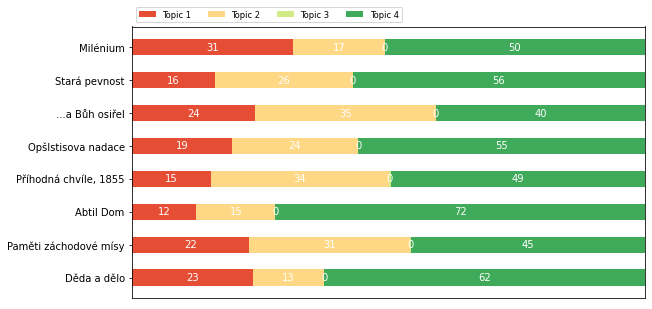

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['Topic 1', 'Topic 2',
                  'Topic 3', 'Topic 4', 'Topic 5']

def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


print_n = 5
to_print_dict = {}
i = 0
pick_topic = 3
for key, value in td_dict.items():
    if max(value) == value[pick_topic]:
        to_print_dict[key] = value 
    #i += 1
    if i > print_n:
        break 


survey(to_print_dict, category_names)
plt.show()